# Long Short-Term Memory Model Training

To demonstrate the workflow of training an LSTM model using a real-world dataset, we can use the IMDB Movie Reviews Dataset for sentiment analysis. This dataset contains labeled reviews for binary sentiment classification (positive or negative). It's a widely used dataset for text classification and sequence modeling tasks.

## Dataset Description:
- Source: IMDB Movie Reviews
- Task: Sentiment Analysis (predict whether a review is positive or negative).
- Input: Movie reviews (text).
- Output: Binary sentiment label (0 for negative, 1 for positive).

### Step 1:  Import Required Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Step 2: Load and Preprocess the Dataset

In [9]:
# Load the IMDB dataset
max_features = 10000  # Number of unique words to use
max_len = 200  # Maximum sequence length
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure uniform input length
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

### Step 3: Define the LSTM Model

In [10]:
model = Sequential([
    Embedding(input_dim=max_features, output_dim=128, input_length=max_len),
    LSTM(128, return_sequences=False),
    Dense(1, activation='sigmoid')
])

### Step 4: Compile the Model

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Step 5: Train the Model

In [12]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/5


2024-12-03 15:24:30.182745: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.7122 - loss: 0.5461 - val_accuracy: 0.8182 - val_loss: 0.4086
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.8852 - loss: 0.2888 - val_accuracy: 0.8140 - val_loss: 0.4479
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9288 - loss: 0.1909 - val_accuracy: 0.8270 - val_loss: 0.3806
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9474 - loss: 0.1453 - val_accuracy: 0.8554 - val_loss: 0.4731
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.9672 - loss: 0.0929 - val_accuracy: 0.8590 - val_loss: 0.4246


### Step 6: Evaluate the Model

In [13]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8569 - loss: 0.4482
Test Accuracy: 0.86


### Step 7: Plot Loss and Accuracy

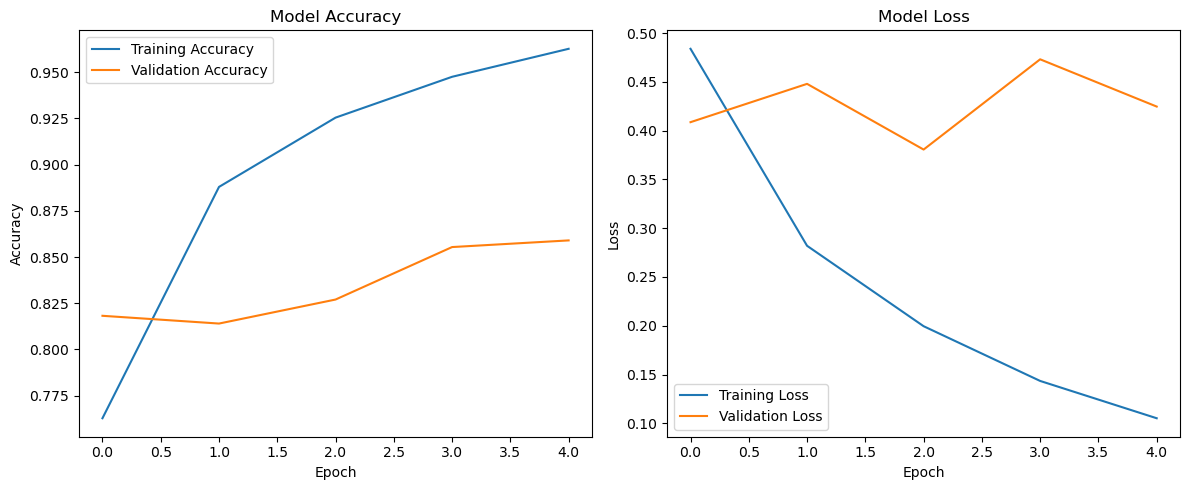

In [14]:
import matplotlib.pyplot as plt
def plot_training_history(history):
    """
    Plots the training and validation loss and accuracy from the history object.

    Parameters:
        history: History object returned from model.fit()
    """
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Show plots
    plt.tight_layout()
    plt.show()

# Call the function to plot
plot_training_history(history)

# Steps for Deployment and Prediction

### Step 1: Save the Trained Model
Use TensorFlow's built-in functions to save the trained model for future use.

In [ ]:
# Save the trained model
from tensorflow.keras.models import save_model

save_model(model, 'sentiment_lstm_model.keras')

### Step 2: Load the Saved Model
Use the saved model for inference.

In [23]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("sentiment_lstm_model.keras")

### Step 3: Prepare New Data for Prediction
Ensure new input data is preprocessed in the same way as the training data.

In [24]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example new reviews
new_reviews = [
    "This movie was fantastic! I loved every moment of it.",
    "Absolutely terrible. Waste of time."
]

# Convert new reviews to word index representation (simulate tokenization)
# For a real-world application, use the same tokenizer as in training.
word_index = imdb.get_word_index()
new_reviews_sequences = [
    [word_index.get(word.lower(), 0) for word in review.split()]
    for review in new_reviews
]

# Pad sequences to match the input length
new_reviews_padded = pad_sequences(new_reviews_sequences, maxlen=200)

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Step 4: Predict Sentiment
Use the model to predict sentiment for the new data.

In [ ]:
# Predict sentiment probabilities
predictions = model.predict(new_reviews_padded)

# Convert probabilities to binary sentiment (0 or 1)
sentiments = ["Positive" if pred > 0.5 else "Negative" for pred in predictions]

# Print the results
for review, sentiment in zip(new_reviews, sentiments):
    print(f"Review: '{review}' => Sentiment: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Review: 'This movie was fantastic! I loved every moment of it.' => Sentiment: Positive
Review: 'Absolutely terrible. Waste of time.' => Sentiment: Positive
